In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')
import collections
from scipy.spatial import distance
from scipy.stats import norm
from scipy import stats
from scipy.stats import wasserstein_distance

In [3]:
df = pd.read_csv('preci_alt.csv')
df.columns = ['date','value']
df.date = pd.to_datetime(df.date,format='%b %d, %Y')
df.head(3)

,date,value
0,2010-01-01,0.0
1,2010-01-02,0.0
2,2010-01-03,0.0


In [14]:
df2019 = df[(df.date.dt.year == 2019) & ((df.date.dt.month == 6)|(df.date.dt.month == 7)|(df.date.dt.month == 8))]
df2018 = df[(df.date.dt.year == 2018) & ((df.date.dt.month == 6)|(df.date.dt.month == 7)|(df.date.dt.month == 8))]
df2017 = df[(df.date.dt.year == 2017) & ((df.date.dt.month == 6)|(df.date.dt.month == 7)|(df.date.dt.month == 8))]
df2016 = df[(df.date.dt.year == 2016) & ((df.date.dt.month == 6)|(df.date.dt.month == 7)|(df.date.dt.month == 8))]
df2019

,date,value
3438,2019-06-01,0.000
3439,2019-06-02,0.000
3440,2019-06-03,0.000
3441,2019-06-04,0.000
3442,2019-06-05,0.001
...,...,...
3525,2019-08-27,0.002
3526,2019-08-28,0.002
3527,2019-08-29,0.002
3528,2019-08-30,0.014


<AxesSubplot:xlabel='value', ylabel='Density'>

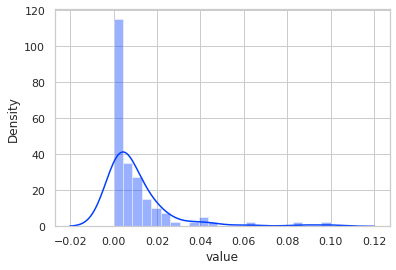

In [15]:
sns.distplot(df2019.value)

<AxesSubplot:xlabel='value', ylabel='Density'>

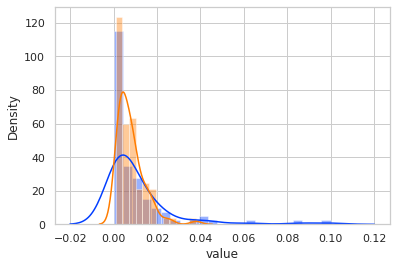

In [16]:
sns.distplot(df2019.value)
sns.distplot(df2018.value)

<AxesSubplot:xlabel='value', ylabel='Density'>

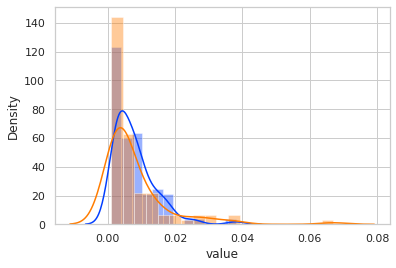

In [17]:
sns.distplot(df2018.value)
sns.distplot(df2017.value)

In [11]:
wasserstein_distance(df2019.value,df2018.value)

0.004543478260869566

In [18]:
wasserstein_distance(df2018.value,df2017.value)

0.002195652173913045

In [39]:
df19 = df[df.date.dt.year==2019]
a = np.zeros(shape=(12, 12))
for i in range(0,12):
    for j in range(0,12):
        dff = df19[df19.date.dt.month == i+1]
        dfj = df19[df19.date.dt.month == j+1]
        x = wasserstein_distance(dff.value,dfj.value)
        a[i][j] = x

In [40]:
dfw = pd.DataFrame(a)
cm = sns.light_palette("green", as_cmap=True)
s = dfw.style.background_gradient(cmap=cm)
s

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,0.000000,0.000367,0.000000,0.007033,0.010968,0.014387,0.011067,0.006548,0.000567,0.000483
1,0.000000,0.000000,0.000000,0.000367,0.000000,0.007033,0.010968,0.014387,0.011067,0.006548,0.000567,0.000483
2,0.000000,0.000000,0.000000,0.000367,0.000000,0.007033,0.010968,0.014387,0.011067,0.006548,0.000567,0.000483
3,0.000367,0.000367,0.000367,0.000000,0.000367,0.006667,0.010601,0.014020,0.010700,0.006182,0.000267,0.000176
4,0.000000,0.000000,0.000000,0.000367,0.000000,0.007033,0.010968,0.014387,0.011067,0.006548,0.000567,0.000483
5,0.007033,0.007033,0.007033,0.006667,0.007033,0.000000,0.005863,0.007354,0.006033,0.003289,0.006467,0.006551
6,0.010968,0.010968,0.010968,0.010601,0.010968,0.005863,0.000000,0.007742,0.002776,0.004419,0.010401,0.010485
7,0.014387,0.014387,0.014387,0.014020,0.014387,0.007354,0.007742,0.000000,0.005802,0.008677,0.013820,0.013904
8,0.011067,0.011067,0.011067,0.010700,0.011067,0.006033,0.002776,0.005802,0.000000,0.004518,0.010500,0.010584
9,0.006548,0.006548,0.006548,0.006182,0.006548,0.003289,0.004419,0.008677,0.004518,0.000000,0.005982,0.006066


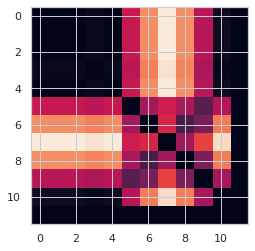

In [36]:
plt.imshow(a, interpolation='none')
plt.show()

In [41]:
df19 = df[df.date.dt.year==2019]
df20 = df[df.date.dt.year==2018]
a = np.zeros(shape=(12, 12))
for i in range(0,12):
    for j in range(0,12):
        dff = df19[df19.date.dt.month == i+1]
        dfj = df20[df20.date.dt.month == j+1]
        x = wasserstein_distance(dff.value,dfj.value)
        a[i][j] = x

In [42]:
dfw = pd.DataFrame(a)
cm = sns.light_palette("green", as_cmap=True)
s = dfw.style.background_gradient(cmap=cm)
s

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,0.000000,0.000233,0.000290,0.006533,0.009710,0.007419,0.001967,0.000677,0.000633,0.000000
1,0.000000,0.000000,0.000000,0.000233,0.000290,0.006533,0.009710,0.007419,0.001967,0.000677,0.000633,0.000000
2,0.000000,0.000000,0.000000,0.000233,0.000290,0.006533,0.009710,0.007419,0.001967,0.000677,0.000633,0.000000
3,0.000367,0.000367,0.000367,0.000133,0.000259,0.006167,0.009343,0.007053,0.001600,0.000319,0.000333,0.000367
4,0.000000,0.000000,0.000000,0.000233,0.000290,0.006533,0.009710,0.007419,0.001967,0.000677,0.000633,0.000000
5,0.007033,0.007033,0.007033,0.006800,0.006743,0.004033,0.006235,0.004005,0.005067,0.006356,0.006400,0.007033
6,0.010968,0.010968,0.010968,0.010734,0.010677,0.004434,0.001516,0.003742,0.009001,0.010290,0.010334,0.010968
7,0.014387,0.014387,0.014387,0.014154,0.014097,0.008929,0.008548,0.009355,0.012420,0.013710,0.013754,0.014387
8,0.011067,0.011067,0.011067,0.010833,0.010776,0.004733,0.003477,0.004686,0.009100,0.010389,0.010433,0.011067
9,0.006548,0.006548,0.006548,0.006315,0.006258,0.001344,0.003419,0.002161,0.004582,0.005871,0.005915,0.006548


In [26]:
df2019

,date,value
3438,2019-06-01,0.000
3439,2019-06-02,0.000
3440,2019-06-03,0.000
3441,2019-06-04,0.000
3442,2019-06-05,0.001
...,...,...
3525,2019-08-27,0.002
3526,2019-08-28,0.002
3527,2019-08-29,0.002
3528,2019-08-30,0.014
